In [2]:
# !pip install highway-env
# !pip install git+https://github.com/DLR-RM/stable-baselines3
# !pip install tensorboardx gym pyvirtualdisplay
# !apt-get install -y xvfb python-opengl ffmpeg
# !git clone https://github.com/eleurent/highway-env.git 2> /dev/null
# !git clone https://github.com/avivg7/highway-config.git
# !pip install tensorboard
# !pip install xvfbwrapper

In [1]:
# General
import sys
sys.path.insert(0, '/content/highway-env/scripts/')
import io
import base64
import os
from tqdm.notebook import trange
import numpy as np
import random
import math
import pygame
import json
import ast
from pprint import pprint 
import glob
from collections import Counter

# Local
from final_project.display_utils import wrap_env, show_video
from models.agent import Agent
from models.utils import plot_learning_curve

# Gym Env
import gym
import highway_env
# from utils import record_videos, show_videos
from gym import logger as gymlogger
from gym.wrappers import Monitor
from gym.utils import seeding
from gym import error, spaces, utils
gymlogger.set_level(40) # error only

# Neural Networks
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

# Visualization
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from IPython.display import HTML
from IPython import display as ipythondisplay

%load_ext tensorboard

pygame 2.1.2 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
os.environ["SDL_VIDEODRIVER"] = "dummy"

display = Display(visible=0, size=(1400, 900))
display.start()

if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [4]:
#=============== DO NOT DELETE ===============
# file = open('/content/highway-config/config_ex1.txt', 'r')
# contents = file.read()
# config1 = ast.literal_eval(contents)
# file.close()
# ============================================

file = open('./highway-config/config_ex1.txt', 'r')
contents = file.read()
# print(contents)
config1 = ast.literal_eval(contents)
file.close()

env = gym.make("highway-fast-v0")
env.configure(config1)
# env = wrap_env(env)
env.reset()
env.config

ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

{'observation': {'vehicles_count': 20,
  'vehicles_density': 3,
  'type': 'GrayscaleObservation',
  'observation_shape': (128, 128),
  'stack_size': 4,
  'weights': [0.2989, 0.587, 0.114],
  'scaling': 1.75},
 'action': {'type': 'DiscreteMetaAction'},
 'simulation_frequency': 5,
 'policy_frequency': 2,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'screen_width': 600,
 'screen_height': 150,
 'centering_position': [0.3, 0.5],
 'scaling': 5.5,
 'show_trajectories': False,
 'render_agent': True,
 'offscreen_rendering': False,
 'manual_control': False,
 'real_time_rendering': False,
 'lanes_count': 3,
 'vehicles_count': 20,
 'controlled_vehicles': 1,
 'initial_lane_id': None,
 'duration': 500,
 'ego_spacing': 1.5,
 'vehicles_density': 1,
 'collision_reward': -1,
 'right_lane_reward': 0.1,
 'high_speed_reward': 0.4,
 'lane_change_reward': 0,
 'reward_speed_range': [20, 30],
 'offroad_terminal': False}

In [5]:
for i in range(100):
    action = env.action_space.sample()
    observation, reward, done, _ = env.step(action)

    pprint(action)
# pprint(observation)
    print(np.max(observation))

4
0.0
4
0.0
1
0.0
4
0.0
4
0.0
3
0.0
1
0.0
0
0.0
4
0.0
1
0.0
0
0.0
1
0.0
2
0.0
1
0.0
2
0.0
0
0.0
4
0.0
4
0.0
2
0.0
2
0.0
1
0.0
2
0.0
3
0.0
3
0.0
2
0.0
2
0.0
2
0.0
3
0.0
2
0.0
4
0.0
3
0.0
2
0.0
1
0.0
1
0.0
3
0.0
4
0.0
2
0.0
4
0.0
1
0.0
2
0.0
4
0.0
4
0.0
4
0.0
0
0.0
0
0.0
1
0.0
1
0.0
0
0.0
4
0.0
4
0.0
3
0.0
0
0.0
1
0.0
1
0.0
4
0.0
4
0.0
3
0.0
3
0.0
3
0.0
1
0.0
1
0.0
1
0.0
4
0.0
1
0.0
4
0.0
3
0.0
4
0.0
2
0.0
2
0.0
4
0.0
3
0.0
1
0.0
1
0.0
3
0.0
3
0.0
3
0.0
4
0.0
4
0.0
2
0.0
2
0.0
3
0.0
2
0.0
1
0.0
4
0.0
3
0.0
1
0.0
4
0.0
3
0.0
4
0.0
1
0.0
3
0.0
4
0.0
1
0.0
0
0.0
4
0.0
0
0.0
2
0.0
2
0.0
1
0.0
1
0.0


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

Episode: 0, Score 6.066940705657929, Average Score: 6.066940705657929


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 1, Score 24.85320716819153, Average Score: 15.460073936

ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 2, Score 6.408900944627118, Average Score: 12.443016272825526


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 3, Score 5.638737584681538, Average Score: 10.741946600789529


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 4, Score 19.666673123562358, Average Score: 12.526891905344096


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 5, Score 12.933676299280018, Average Score: 12.594689304333416


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 6, Score 23.974017736849248, Average Score: 14.220307651835679
T.min(state): 0.0
T.max(stat

ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 7, Score 19.361230777320433, Average Score: 14.862923042521272


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
Episode: 8, Score 7.466720797825435, Average Score: 14.041122793110624


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(stat

ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(stat

ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: N

T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(state): 0.0
T.min(state): 0.0
T.max(stat

ValueError: Expected parameter loc (Tensor of shape (1, 5)) of distribution Normal(loc: torch.Size([1, 5]), scale: torch.Size([1, 5])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan, nan]], device='cuda:0', grad_fn=<AddmmBackward0>)

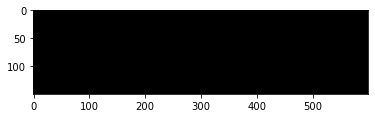

In [6]:
done = False
n_games = 500
figure_file = 'plots/highway_500'

agent = Agent(input_dims=env.observation_space.shape,
              env=env,
              n_actions=5,
              max_size=10000)

best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

if load_checkpoint:
    agent.load_models()
    env.render(mode='human')
    
for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0
    while not done:
        action = agent.choose_action(observation)
        new_observation, reward, done, info = env.step(action)
        score += reward
        agent.remember(observation, action, reward, new_observation, done)
        if not load_checkpoint:
            agent.learn()
        observation = new_observation
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])
    
    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()
    
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    print(f'Episode: {i}, Score {score}, Average Score: {avg_score}')
    
if not load_checkpoint:
    x = [i+1 for i in range(n_games)]
    plot_learning_curve(x, score_history, figure_file)

In [ ]:
env.action_space

In [ ]:
env.close()
show_video()

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.uniform(m.weight,  -3*1.e-4, 3*1.e-4)
            m.bias.data.fill_(0.0001)

class ActorNet(nn.Module):
    def __init__(self):
        super(ActorNet, self).__init__()
        self.shared_layers = nn.Sequential( # todo: name
            nn.Conv2d(4, 32, kernel_size=8, stride=4, padding=0),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Flatten(start_dim=0),
            nn.Linear(64*12*12, 5),
        )
        self.shared_layers.apply(init_weights)

    def forward(self, x):
        input_tensor = torch.tensor(x, dtype=torch.float)
        hidden = self.shared_layers(input_tensor)
        #output = self.output(hidden)
        actions_probs = Categorical(F.softmax(hidden, dim=-1))

        return actions_probs, hidden

class CriticNet(nn.Module):
    def __init__(self):
        super(CriticNet, self).__init__()
        self.shared_layers = nn.Sequential(  # todo: name
            nn.Conv2d(4, 32, kernel_size=8, stride=4, padding=0),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Flatten(start_dim=0),
            nn.Linear(64 * 12 * 12, 1),
        )


    def forward(self, x):
        input_tensor = torch.FloatTensor(x)
        hidden = self.shared_layers(input_tensor)

        return hidden